In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
sns.set_style('darkgrid')
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('ufcdata/preprocessed_data.csv')
df.head()

,Winner,title_bout,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_BODY_att,B_avg_BODY_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,...,weight_class_Women's Strawweight,B_Stance_Open Stance,B_Stance_Orthodox,B_Stance_Sideways,B_Stance_Southpaw,B_Stance_Switch,R_Stance_Open Stance,R_Stance_Orthodox,R_Stance_Southpaw,R_Stance_Switch
0,Red,True,5,0.0,4.0,0.0,9.200000,6.000000,0.200000,0.000000,...,0,0,1,0,0,0,0,1,0,0
1,Red,True,5,0.0,3.0,0.0,14.600000,9.100000,11.800000,7.300000,...,0,0,1,0,0,0,0,0,1,0
2,Red,False,3,0.0,3.0,0.0,15.354839,11.322581,6.741935,4.387097,...,0,0,1,0,0,0,0,1,0,0
3,Blue,False,3,0.0,4.0,0.0,17.000000,14.000000,13.750000,11.000000,...,0,0,0,0,0,1,0,1,0,0
4,Blue,False,3,0.0,1.0,0.0,17.000000,14.500000,2.500000,2.000000,...,0,0,0,0,1,0,0,0,1,0


In [3]:
#Partitioning the dataset to X as predictors, and y as target
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3592 entries, 0 to 3591
Columns: 160 entries, Winner to R_Stance_Switch
dtypes: bool(1), float64(134), int64(24), object(1)
memory usage: 4.4+ MB


From the results above, we can see that there are two non-numeric features, winner and title_bout. The winner will be used as taget but the title bout will remain as a predictor and will be encoded with dummy variables.

In [5]:
#Encoding the title_bout feature
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()
X[:, 0] = labelencoder_X_1.fit_transform(X[:, 0])


#Encoding Y
labelencoder_y = LabelEncoder()
y[:] = labelencoder_y.fit_transform(y[:])


In [6]:
#Checking for proper dimensions of predictors, target and the encoding of title_bout
print("X Dimension: ",X.shape)
print()
print("y Dimension: ",y.shape)
print()
print("First row title bout value: 1 is True, 0 is False ==> ",X[0,0])
print("First row corner value: 1 is Red, 0 is Blue ==> ",y[3])
df.head()


X Dimension:  (3592, 159)

y Dimension:  (3592,)

First row title bout value: 1 is True, 0 is False ==>  1
First row corner value: 1 is Red, 0 is Blue ==>  0


,Winner,title_bout,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_BODY_att,B_avg_BODY_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,...,weight_class_Women's Strawweight,B_Stance_Open Stance,B_Stance_Orthodox,B_Stance_Sideways,B_Stance_Southpaw,B_Stance_Switch,R_Stance_Open Stance,R_Stance_Orthodox,R_Stance_Southpaw,R_Stance_Switch
0,1,True,5,0.0,4.0,0.0,9.200000,6.000000,0.200000,0.000000,...,0,0,1,0,0,0,0,1,0,0
1,1,True,5,0.0,3.0,0.0,14.600000,9.100000,11.800000,7.300000,...,0,0,1,0,0,0,0,0,1,0
2,1,False,3,0.0,3.0,0.0,15.354839,11.322581,6.741935,4.387097,...,0,0,1,0,0,0,0,1,0,0
3,0,False,3,0.0,4.0,0.0,17.000000,14.000000,13.750000,11.000000,...,0,0,0,0,0,1,0,1,0,0
4,0,False,3,0.0,1.0,0.0,17.000000,14.500000,2.500000,2.000000,...,0,0,0,0,1,0,0,0,1,0


From the results above, we can see that we have properly encoded the feature

In [7]:
#Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [8]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
#keras for ANN
import keras
from keras.models import Sequential
from keras.layers import Dense


Using TensorFlow backend.


In [10]:
#ANN Model
classifier = Sequential()
classifier.add(Dense(output_dim = 50,init = 'uniform', activation = 'relu', input_dim = 159))
classifier.add(Dense(output_dim = 50,init = 'uniform', activation = 'relu'))
classifier.add(Dense(output_dim = 1,init = 'uniform', activation = 'sigmoid'))

#compiling the model
classifier.compile(optimizer = 'adam',
                  loss = 'binary_crossentropy',
                  metrics = ['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [11]:
pred1 = classifier.fit(X_train, y_train,
              batch_size = 900,
              nb_epoch = 100)


Epoch 1/100
2873/2873 [==============================] - 0s 156us/step - loss: 0.6921 - accuracy: 0.5740
Epoch 2/100
2873/2873 [==============================] - 0s 5us/step - loss: 0.6857 - accuracy: 0.6700
Epoch 3/100
2873/2873 [==============================] - 0s 5us/step - loss: 0.6770 - accuracy: 0.6700
Epoch 4/100
2873/2873 [==============================] - 0s 5us/step - loss: 0.6634 - accuracy: 0.6700
Epoch 5/100
2873/2873 [==============================] - 0s 5us/step - loss: 0.6445 - accuracy: 0.6700
Epoch 6/100
2873/2873 [==============================] - 0s 5us/step - loss: 0.6226 - accuracy: 0.6700
Epoch 7/100
2873/2873 [==============================] - 0s 4us/step - loss: 0.6032 - accuracy: 0.6700
Epoch 8/100
2873/2873 [==============================] - 0s 4us/step - loss: 0.5950 - accuracy: 0.6700
Epoch 9/100
2873/2873 [==============================] - 0s 5us/step - loss: 0.5920 - accuracy: 0.6700
Epoch 10/100
2873/2873 [==============================] - 0s 5us/step 

2873/2873 [==============================] - 0s 5us/step - loss: 0.2663 - accuracy: 0.9053
Epoch 78/100
2873/2873 [==============================] - 0s 5us/step - loss: 0.2600 - accuracy: 0.9085
Epoch 79/100
2873/2873 [==============================] - 0s 5us/step - loss: 0.2541 - accuracy: 0.9112
Epoch 80/100
2873/2873 [==============================] - 0s 5us/step - loss: 0.2475 - accuracy: 0.9158
Epoch 81/100
2873/2873 [==============================] - 0s 5us/step - loss: 0.2389 - accuracy: 0.9245
Epoch 82/100
2873/2873 [==============================] - 0s 5us/step - loss: 0.2347 - accuracy: 0.9234
Epoch 83/100
2873/2873 [==============================] - 0s 5us/step - loss: 0.2267 - accuracy: 0.9255
Epoch 84/100
2873/2873 [==============================] - 0s 5us/step - loss: 0.2219 - accuracy: 0.9304
Epoch 85/100
2873/2873 [==============================] - 0s 5us/step - loss: 0.2166 - accuracy: 0.9342
Epoch 86/100
2873/2873 [==============================] - 0s 5us/step - loss:

In [12]:
pred1.history

{'loss': [0.6921310963798308,
  0.6857216571873587,
  0.6770382949047042,
  0.663355484993832,
  0.6444599212066578,
  0.6225859454148661,
  0.603175695976479,
  0.5950108705976057,
  0.5919677074512372,
  0.5886928537271183,
  0.5831014280571492,
  0.5773045167539579,
  0.5740002955952215,
  0.5712358237059739,
  0.5683995537171993,
  0.5653350437471687,
  0.5622251141664669,
  0.559361059264028,
  0.5567881868684744,
  0.5536588954045886,
  0.5503465150898855,
  0.5468987800541382,
  0.54371923135624,
  0.5402172300984044,
  0.5363142534369506,
  0.5327604747465833,
  0.5291937033432185,
  0.5258292032375262,
  0.5217217936816217,
  0.5180970160151208,
  0.514323010952515,
  0.5111626792443658,
  0.5069071683077043,
  0.5035314061813474,
  0.4998738695282244,
  0.4957959678917449,
  0.4918410284175634,
  0.4880892760841597,
  0.48368168784855886,
  0.4810039087160099,
  0.47670050412986986,
  0.47126328704500714,
  0.4669025159861375,
  0.4617643070021781,
  0.4575564220438757,
  0.4

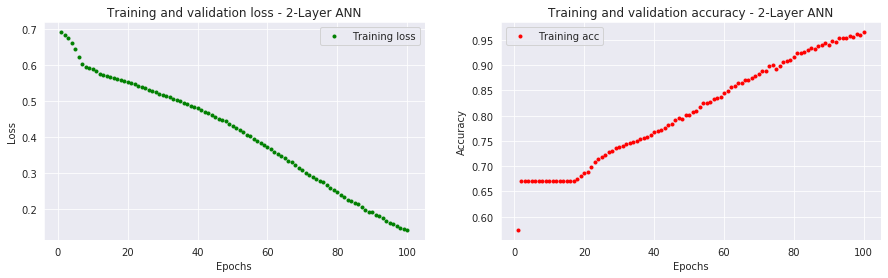

In [13]:
#Extracting CNN Results for Visualization
hist_ann = pred1.history
loss_values = hist_ann['loss']
acc_values = hist_ann['accuracy'] 


epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(15,4))
plt.subplot(121)
plt.plot(epochs, loss_values, 'g.', label='Training loss')


plt.title('Training and validation loss - 2-Layer ANN')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122)
plt.plot(epochs, acc_values, 'r.', label='Training acc')
plt.title('Training and validation accuracy - 2-Layer ANN')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('fight_pred1.png')
plt.show()

To ensure there is no bias or accident that the training results was really high, K-Fold will be utilize to ensure consistency of the model.

In [14]:
#K-Fold validation model
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

In [15]:
#function to introduce model training in keras with sklearn k-fold
def build_predictor():
    #ANN Model
    predictor = Sequential()
    predictor.add(Dense(output_dim = 50,init = 'uniform', activation = 'relu', input_dim = 159))
    predictor.add(Dense(output_dim = 50,init = 'uniform', activation = 'relu'))
    predictor.add(Dense(output_dim = 1,init = 'uniform', activation = 'sigmoid'))

    #compiling the model
    predictor.compile(optimizer = 'adam',
                      loss = 'binary_crossentropy',
                      metrics = ['accuracy'])
    return predictor

In [16]:
classifier_sk = KerasClassifier(build_fn = build_predictor, batch_size = 900, epochs = 100)

In [17]:
accuracies = cross_val_score(estimator = classifier_sk,
                             X = X_train,
                             y = y_train,
                             cv = 10)

Epoch 1/100
2585/2585 [==============================] - 0s 40us/step - loss: 0.6923 - accuracy: 0.5660
Epoch 2/100
2585/2585 [==============================] - 0s 4us/step - loss: 0.6871 - accuracy: 0.6723
Epoch 3/100
2585/2585 [==============================] - 0s 4us/step - loss: 0.6810 - accuracy: 0.6723
Epoch 4/100
2585/2585 [==============================] - 0s 4us/step - loss: 0.6725 - accuracy: 0.6723
Epoch 5/100
2585/2585 [==============================] - 0s 4us/step - loss: 0.6609 - accuracy: 0.6723
Epoch 6/100
2585/2585 [==============================] - 0s 4us/step - loss: 0.6465 - accuracy: 0.6723
Epoch 7/100
2585/2585 [==============================] - 0s 4us/step - loss: 0.6293 - accuracy: 0.6723
Epoch 8/100
2585/2585 [==============================] - 0s 4us/step - loss: 0.6121 - accuracy: 0.6723
Epoch 9/100
2585/2585 [==============================] - 0s 4us/step - loss: 0.5992 - accuracy: 0.6723
Epoch 10/100
2585/2585 [==============================] - 0s 4us/step - 

2585/2585 [==============================] - 0s 4us/step - loss: 0.2650 - accuracy: 0.9044
Epoch 80/100
2585/2585 [==============================] - 0s 4us/step - loss: 0.2559 - accuracy: 0.9184
Epoch 81/100
2585/2585 [==============================] - 0s 4us/step - loss: 0.2463 - accuracy: 0.9215
Epoch 82/100
2585/2585 [==============================] - 0s 4us/step - loss: 0.2388 - accuracy: 0.9257
Epoch 83/100
2585/2585 [==============================] - 0s 4us/step - loss: 0.2306 - accuracy: 0.9269
Epoch 84/100
2585/2585 [==============================] - 0s 4us/step - loss: 0.2213 - accuracy: 0.9362
Epoch 85/100
2585/2585 [==============================] - 0s 4us/step - loss: 0.2141 - accuracy: 0.9358
Epoch 86/100
2585/2585 [==============================] - 0s 4us/step - loss: 0.2075 - accuracy: 0.9400
Epoch 87/100
2585/2585 [==============================] - 0s 4us/step - loss: 0.1997 - accuracy: 0.9451
Epoch 88/100
2585/2585 [==============================] - 0s 4us/step - loss:

2585/2585 [==============================] - 0s 5us/step - loss: 0.4489 - accuracy: 0.7880
Epoch 58/100
2585/2585 [==============================] - 0s 5us/step - loss: 0.4443 - accuracy: 0.7923
Epoch 59/100
2585/2585 [==============================] - 0s 4us/step - loss: 0.4397 - accuracy: 0.7954
Epoch 60/100
2585/2585 [==============================] - 0s 5us/step - loss: 0.4351 - accuracy: 0.7992
Epoch 61/100
2585/2585 [==============================] - 0s 5us/step - loss: 0.4301 - accuracy: 0.8015
Epoch 62/100
2585/2585 [==============================] - 0s 5us/step - loss: 0.4252 - accuracy: 0.8050
Epoch 63/100
2585/2585 [==============================] - 0s 5us/step - loss: 0.4202 - accuracy: 0.8070
Epoch 64/100
2585/2585 [==============================] - 0s 4us/step - loss: 0.4148 - accuracy: 0.8104
Epoch 65/100
2585/2585 [==============================] - 0s 5us/step - loss: 0.4098 - accuracy: 0.8132
Epoch 66/100
2585/2585 [==============================] - 0s 4us/step - loss:

2585/2585 [==============================] - 0s 4us/step - loss: 0.5016 - accuracy: 0.7582
Epoch 36/100
2585/2585 [==============================] - 0s 5us/step - loss: 0.4972 - accuracy: 0.7617
Epoch 37/100
2585/2585 [==============================] - 0s 5us/step - loss: 0.4926 - accuracy: 0.7648
Epoch 38/100
2585/2585 [==============================] - 0s 5us/step - loss: 0.4883 - accuracy: 0.7679
Epoch 39/100
2585/2585 [==============================] - 0s 5us/step - loss: 0.4835 - accuracy: 0.7721
Epoch 40/100
2585/2585 [==============================] - 0s 5us/step - loss: 0.4789 - accuracy: 0.7752
Epoch 41/100
2585/2585 [==============================] - 0s 4us/step - loss: 0.4740 - accuracy: 0.7783
Epoch 42/100
2585/2585 [==============================] - 0s 5us/step - loss: 0.4692 - accuracy: 0.7826
Epoch 43/100
2585/2585 [==============================] - 0s 5us/step - loss: 0.4642 - accuracy: 0.7845
Epoch 44/100
2585/2585 [==============================] - 0s 4us/step - loss:

2586/2586 [==============================] - 0s 4us/step - loss: 0.5835 - accuracy: 0.6725
Epoch 14/100
2586/2586 [==============================] - 0s 4us/step - loss: 0.5786 - accuracy: 0.6725
Epoch 15/100
2586/2586 [==============================] - 0s 4us/step - loss: 0.5748 - accuracy: 0.6725
Epoch 16/100
2586/2586 [==============================] - 0s 4us/step - loss: 0.5721 - accuracy: 0.6725
Epoch 17/100
2586/2586 [==============================] - 0s 4us/step - loss: 0.5696 - accuracy: 0.6725
Epoch 18/100
2586/2586 [==============================] - 0s 4us/step - loss: 0.5667 - accuracy: 0.6725
Epoch 19/100
2586/2586 [==============================] - 0s 4us/step - loss: 0.5635 - accuracy: 0.6725
Epoch 20/100
2586/2586 [==============================] - 0s 4us/step - loss: 0.5606 - accuracy: 0.6740
Epoch 21/100
2586/2586 [==============================] - 0s 4us/step - loss: 0.5580 - accuracy: 0.6798
Epoch 22/100
2586/2586 [==============================] - 0s 4us/step - loss:

2586/2586 [==============================] - 0s 4us/step - loss: 0.1493 - accuracy: 0.9656
Epoch 92/100
2586/2586 [==============================] - 0s 4us/step - loss: 0.1448 - accuracy: 0.9660
Epoch 93/100
2586/2586 [==============================] - 0s 4us/step - loss: 0.1379 - accuracy: 0.9691
Epoch 94/100
2586/2586 [==============================] - 0s 4us/step - loss: 0.1336 - accuracy: 0.9725
Epoch 95/100
2586/2586 [==============================] - 0s 4us/step - loss: 0.1273 - accuracy: 0.9725
Epoch 96/100
2586/2586 [==============================] - 0s 4us/step - loss: 0.1223 - accuracy: 0.9768
Epoch 97/100
2586/2586 [==============================] - 0s 4us/step - loss: 0.1174 - accuracy: 0.9783
Epoch 98/100
2586/2586 [==============================] - 0s 4us/step - loss: 0.1121 - accuracy: 0.9803
Epoch 99/100
2586/2586 [==============================] - 0s 4us/step - loss: 0.1076 - accuracy: 0.9818
Epoch 100/100
287/287 [==============================] - 0s 111us/step
Epoch 

2586/2586 [==============================] - 0s 5us/step - loss: 0.3356 - accuracy: 0.8720
Epoch 70/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.3266 - accuracy: 0.8786
Epoch 71/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.3174 - accuracy: 0.8824
Epoch 72/100
2586/2586 [==============================] - 0s 4us/step - loss: 0.3088 - accuracy: 0.8859
Epoch 73/100
2586/2586 [==============================] - 0s 4us/step - loss: 0.2998 - accuracy: 0.8917
Epoch 74/100
2586/2586 [==============================] - 0s 4us/step - loss: 0.2921 - accuracy: 0.9002
Epoch 75/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.2816 - accuracy: 0.8991
Epoch 76/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.2726 - accuracy: 0.9084
Epoch 77/100
2586/2586 [==============================] - 0s 4us/step - loss: 0.2649 - accuracy: 0.9111
Epoch 78/100
2586/2586 [==============================] - 0s 5us/step - loss:

2586/2586 [==============================] - 0s 4us/step - loss: 0.4563 - accuracy: 0.7819
Epoch 48/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.4516 - accuracy: 0.7827
Epoch 49/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.4464 - accuracy: 0.7877
Epoch 50/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.4416 - accuracy: 0.7908
Epoch 51/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.4364 - accuracy: 0.7974
Epoch 52/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.4312 - accuracy: 0.7978
Epoch 53/100
2586/2586 [==============================] - 0s 4us/step - loss: 0.4261 - accuracy: 0.8020
Epoch 54/100
2586/2586 [==============================] - 0s 4us/step - loss: 0.4206 - accuracy: 0.8047
Epoch 55/100
2586/2586 [==============================] - 0s 4us/step - loss: 0.4146 - accuracy: 0.8113
Epoch 56/100
2586/2586 [==============================] - 0s 4us/step - loss:

2586/2586 [==============================] - 0s 5us/step - loss: 0.5495 - accuracy: 0.6717
Epoch 26/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.5469 - accuracy: 0.6790
Epoch 27/100
2586/2586 [==============================] - 0s 4us/step - loss: 0.5443 - accuracy: 0.6875
Epoch 28/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.5418 - accuracy: 0.6953
Epoch 29/100
2586/2586 [==============================] - 0s 4us/step - loss: 0.5392 - accuracy: 0.7007
Epoch 30/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.5364 - accuracy: 0.7084
Epoch 31/100
2586/2586 [==============================] - 0s 4us/step - loss: 0.5337 - accuracy: 0.7119
Epoch 32/100
2586/2586 [==============================] - 0s 4us/step - loss: 0.5310 - accuracy: 0.7158
Epoch 33/100
2586/2586 [==============================] - 0s 4us/step - loss: 0.5280 - accuracy: 0.7193
Epoch 34/100
2586/2586 [==============================] - 0s 5us/step - loss:

2586/2586 [==============================] - 0s 5us/step - loss: 0.6814 - accuracy: 0.6671
Epoch 4/100
2586/2586 [==============================] - 0s 4us/step - loss: 0.6730 - accuracy: 0.6671
Epoch 5/100
2586/2586 [==============================] - 0s 4us/step - loss: 0.6619 - accuracy: 0.6671
Epoch 6/100
2586/2586 [==============================] - 0s 4us/step - loss: 0.6468 - accuracy: 0.6671
Epoch 7/100
2586/2586 [==============================] - 0s 4us/step - loss: 0.6302 - accuracy: 0.6671
Epoch 8/100
2586/2586 [==============================] - 0s 4us/step - loss: 0.6131 - accuracy: 0.6671
Epoch 9/100
2586/2586 [==============================] - 0s 4us/step - loss: 0.6007 - accuracy: 0.6671
Epoch 10/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.5940 - accuracy: 0.6671
Epoch 11/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.5913 - accuracy: 0.6671
Epoch 12/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.589

Epoch 82/100
2586/2586 [==============================] - 0s 4us/step - loss: 0.1963 - accuracy: 0.9470
Epoch 83/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.1890 - accuracy: 0.9501
Epoch 84/100
2586/2586 [==============================] - 0s 4us/step - loss: 0.1817 - accuracy: 0.9532
Epoch 85/100
2586/2586 [==============================] - 0s 4us/step - loss: 0.1750 - accuracy: 0.9571
Epoch 86/100
2586/2586 [==============================] - 0s 4us/step - loss: 0.1682 - accuracy: 0.9575
Epoch 87/100
2586/2586 [==============================] - 0s 4us/step - loss: 0.1619 - accuracy: 0.9625
Epoch 88/100
2586/2586 [==============================] - 0s 4us/step - loss: 0.1546 - accuracy: 0.9637
Epoch 89/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.1491 - accuracy: 0.9675
Epoch 90/100
2586/2586 [==============================] - 0s 4us/step - loss: 0.1438 - accuracy: 0.9679
Epoch 91/100
2586/2586 [==============================] - 0s 5us

2586/2586 [==============================] - 0s 5us/step - loss: 0.4147 - accuracy: 0.8306
Epoch 61/100
2586/2586 [==============================] - 0s 4us/step - loss: 0.4077 - accuracy: 0.8322
Epoch 62/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.4020 - accuracy: 0.8368
Epoch 63/100
2586/2586 [==============================] - 0s 4us/step - loss: 0.3952 - accuracy: 0.8426
Epoch 64/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.3878 - accuracy: 0.8469
Epoch 65/100
2586/2586 [==============================] - 0s 4us/step - loss: 0.3820 - accuracy: 0.8492
Epoch 66/100
2586/2586 [==============================] - 0s 4us/step - loss: 0.3742 - accuracy: 0.8554
Epoch 67/100
2586/2586 [==============================] - 0s 4us/step - loss: 0.3677 - accuracy: 0.8589
Epoch 68/100
2586/2586 [==============================] - 0s 4us/step - loss: 0.3595 - accuracy: 0.8627
Epoch 69/100
2586/2586 [==============================] - 0s 5us/step - loss:

2586/2586 [==============================] - 0s 4us/step - loss: 0.5014 - accuracy: 0.7533
Epoch 39/100
2586/2586 [==============================] - 0s 4us/step - loss: 0.4976 - accuracy: 0.7572
Epoch 40/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.4935 - accuracy: 0.7591
Epoch 41/100
2586/2586 [==============================] - 0s 4us/step - loss: 0.4897 - accuracy: 0.7618
Epoch 42/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.4859 - accuracy: 0.7657
Epoch 43/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.4816 - accuracy: 0.7688
Epoch 44/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.4777 - accuracy: 0.7699
Epoch 45/100
2586/2586 [==============================] - 0s 4us/step - loss: 0.4738 - accuracy: 0.7742
Epoch 46/100
2586/2586 [==============================] - 0s 4us/step - loss: 0.4694 - accuracy: 0.7765
Epoch 47/100
2586/2586 [==============================] - 0s 5us/step - loss:

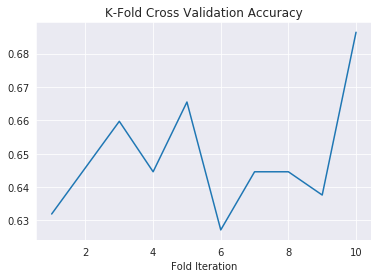

In [18]:
plt.plot(range(1,11),accuracies)
plt.xlabel('Fold Iteration')
plt.title("K-Fold Cross Validation Accuracy")
plt.savefig("ann_k_fold.png")
plt.show()

In [19]:
accuracies

array([0.63194442, 0.64583331, 0.65972221, 0.64459932, 0.66550523,
       0.62717772, 0.64459932, 0.64459932, 0.63763064, 0.68641114])

In [20]:
#GridSearch validation model
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [22]:
#function to introduce model training in keras with Gridsearch
def build_classifier(optimizer):
    #ANN Model
    classifier = Sequential()
    classifier.add(Dense(output_dim = 6,init = 'uniform', activation = 'relu', input_dim = 11))
    classifier.add(Dense(output_dim = 6,init = 'uniform', activation = 'relu'))
    classifier.add(Dense(output_dim = 1,init = 'uniform', activation = 'sigmoid'))

    #compiling the model
    classifier.compile(optimizer = optimizer,
                      loss = 'binary_crossentropy',
                      metrics = ['accuracy'])
    return classifier

In [ ]:
# classifier_sk = KerasClassifier(build_fn = build_classifier)